<a href="https://colab.research.google.com/github/BooEazy/Project_DataScience/blob/main/Project/Diabetes_Prediction_(Classification)_Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
default_dir = "/content/drive/MyDrive/Colab Notebooks/Project6"
os.chdir(default_dir)

In [ ]:
!ls

 diabetes.csv
'Salinan dari [Original] diabetes-prediction-using-classification-models.ipynb'
'Salinan dari [Sandbox] Diabetes Prediction (Classification)-Project6.ipynb'


# Import Libraries

In [ ]:
import warnings
warnings.simplefilter(action="ignore")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier
)

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    classification_report
)

from sklearn.model_selection import (
    KFold,
    train_test_split,
    GridSearchCV,
    cross_val_score
)

# 1.&nbsp;Load Dataset

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1.1 Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, **all patients here are females at least 21 years old of Pima Indian heritage**.

The datasets consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We build a **machine learning model** to accurately predict whether or not the patients in the dataset have **diabetes or not.**

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 1.2 General Information on Variables

### a. Glucose Tolerance Test
It is a blood test that involves taking multiple blood samples over time, usually 2 hours.It used to diagnose diabetes. The results can be classified as normal, impaired, or abnormal.
* **Normal Results for Diabetes ->** Two-hour glucose level less than 140 mg/dL

* **Impaired Results for Diabetes ->** Two-hour glucose level 140 to 200 mg/dL

* **Abnormal (Diagnostic) Results for Diabetes ->** Two-hour glucose level greater than 200 mg/dL



### b. BloodPressure
The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.

* **Normal**: Systolic below 120 and diastolic below 80
* **Elevated**: Systolic 120–129 and diastolic under 80
* **Hypertension stage 1**: Systolic 130–139 and diastolic 80–89
* **Hypertension stage 2**: Systolic 140-plus and diastolic 90 or more
* **Hypertensive crisis**: Systolic higher than 180 and diastolic above 120.

### c. BMI

The standard weight status categories associated with BMI ranges for adults are shown in the following table.

* Below 18.5 -> **Underweight**
* 18.5 – 24.9 -> **Normal or Healthy Weight**
* 25.0 – 29.9 -> **Overweight**
* 30.0 and Above -> **Obese**

### d. Triceps Skinfolds
For adults, the standard normal values for triceps skinfolds are:
* 18.0mm (women)

# 2.&nbsp;Exploratory Data Analysis

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,171.00,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,245.00,30,0
766,1,126,60,0,0,30.1,349.00,47,1
767,1,93,70,31,0,30.4,315.00,23,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Getting various summary statistics
# There is notably a large difference between 99% and max values of predictors
# “Insulin”, ”SkinThickness”, ”DiabetesPedigreeFunction”
# There are extreme values-Outliers in our data set

# See BMI Min: 0
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.0,0.00,1.0,3.0,6.00,9.0,10.000,13.000,17.0
Glucose,768.0,120.894531,31.972618,0.0,79.00,99.0,117.0,140.25,167.0,181.000,196.000,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,38.70,62.0,72.0,80.00,88.0,90.000,106.000,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.00,0.0,23.0,32.00,40.0,44.000,51.330,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.00,0.0,30.5,127.25,210.0,293.000,519.900,846.0
BMI,768.0,31.992578,7.884160,0.0,21.80,27.3,32.0,36.60,41.5,44.395,50.759,67.1
DiabetesPedigreeFunction,768.0,347.079349,254.431659,0.1,0.34,165.0,295.5,527.25,722.9,827.300,950.980,997.0
Age,768.0,33.240885,11.760232,21.0,21.00,24.0,29.0,41.00,51.0,58.000,67.000,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.0,0.0,1.00,1.0,1.000,1.000,1.0


In [ ]:
# Target Variable: Categorical
df['Outcome'].unique()

array([1, 0])

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

# 3.&nbsp;Data Visualization

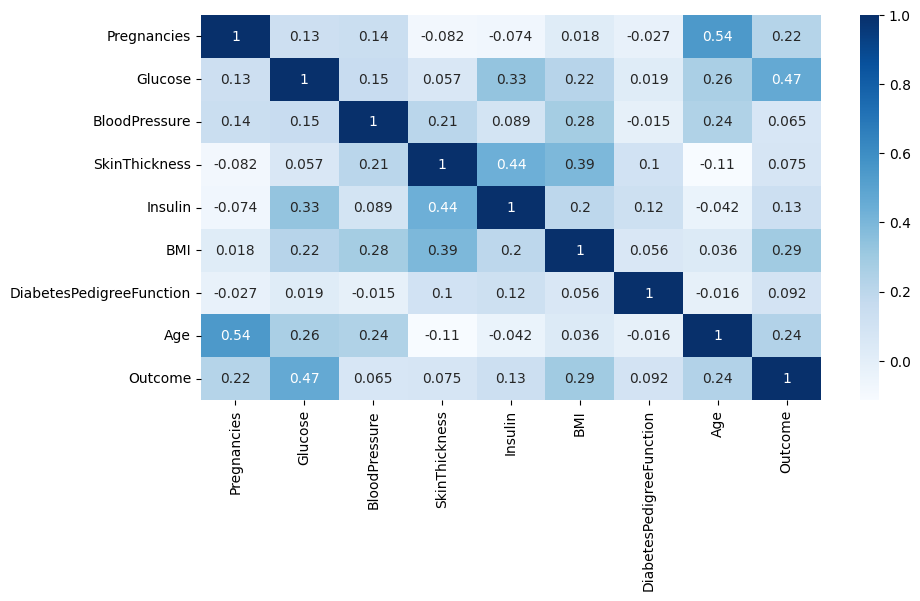

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    df.corr(),
    cmap='Blues',
    annot=True
);
#Kolerasi yang bagus itu menuju 1
#Korelasi positif itu berbanding lurus
#kalo minus besar korelasi kuat tapi berlawanan

In [ ]:
df.nlargest(10, 'BloodPressure')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,207.00,27,0
691,13,158,114,0,0,42.3,257.00,44,1
43,9,171,110,24,240,45.4,721.00,54,1
177,0,129,110,46,130,67.1,319.00,26,1
549,4,189,110,31,0,28.5,0.68,37,0
84,5,137,108,0,0,48.8,227.00,37,1
362,5,103,108,37,0,39.2,305.00,65,0
658,11,127,106,0,0,39.0,0.19,51,0
662,8,167,106,46,231,37.6,165.00,43,1
672,10,68,106,23,49,35.5,285.00,47,0


In [ ]:
# df.corr()

In [ ]:
k = 10
k_largest_corr = df.corr().nlargest(k, 'Outcome')
k_largest_feats = k_largest_corr['Outcome'].index
list(k_largest_feats)

['Outcome',
 'Glucose',
 'BMI',
 'Age',
 'Pregnancies',
 'Insulin',
 'DiabetesPedigreeFunction',
 'SkinThickness',
 'BloodPressure']

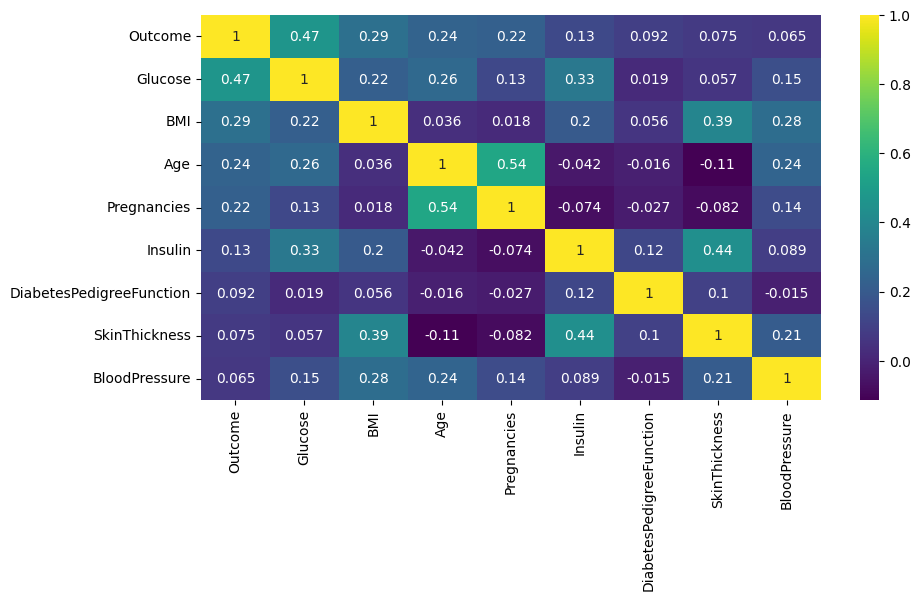

In [ ]:
# Outcome correlation matrix

k = 9 # number of variables for heatmap
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
corr_mat = df[cols].corr()

#Visualisasikan
plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_mat, cmap='viridis', annot=True,
);

In [ ]:
# df.loc[df.Pregnancies==12]

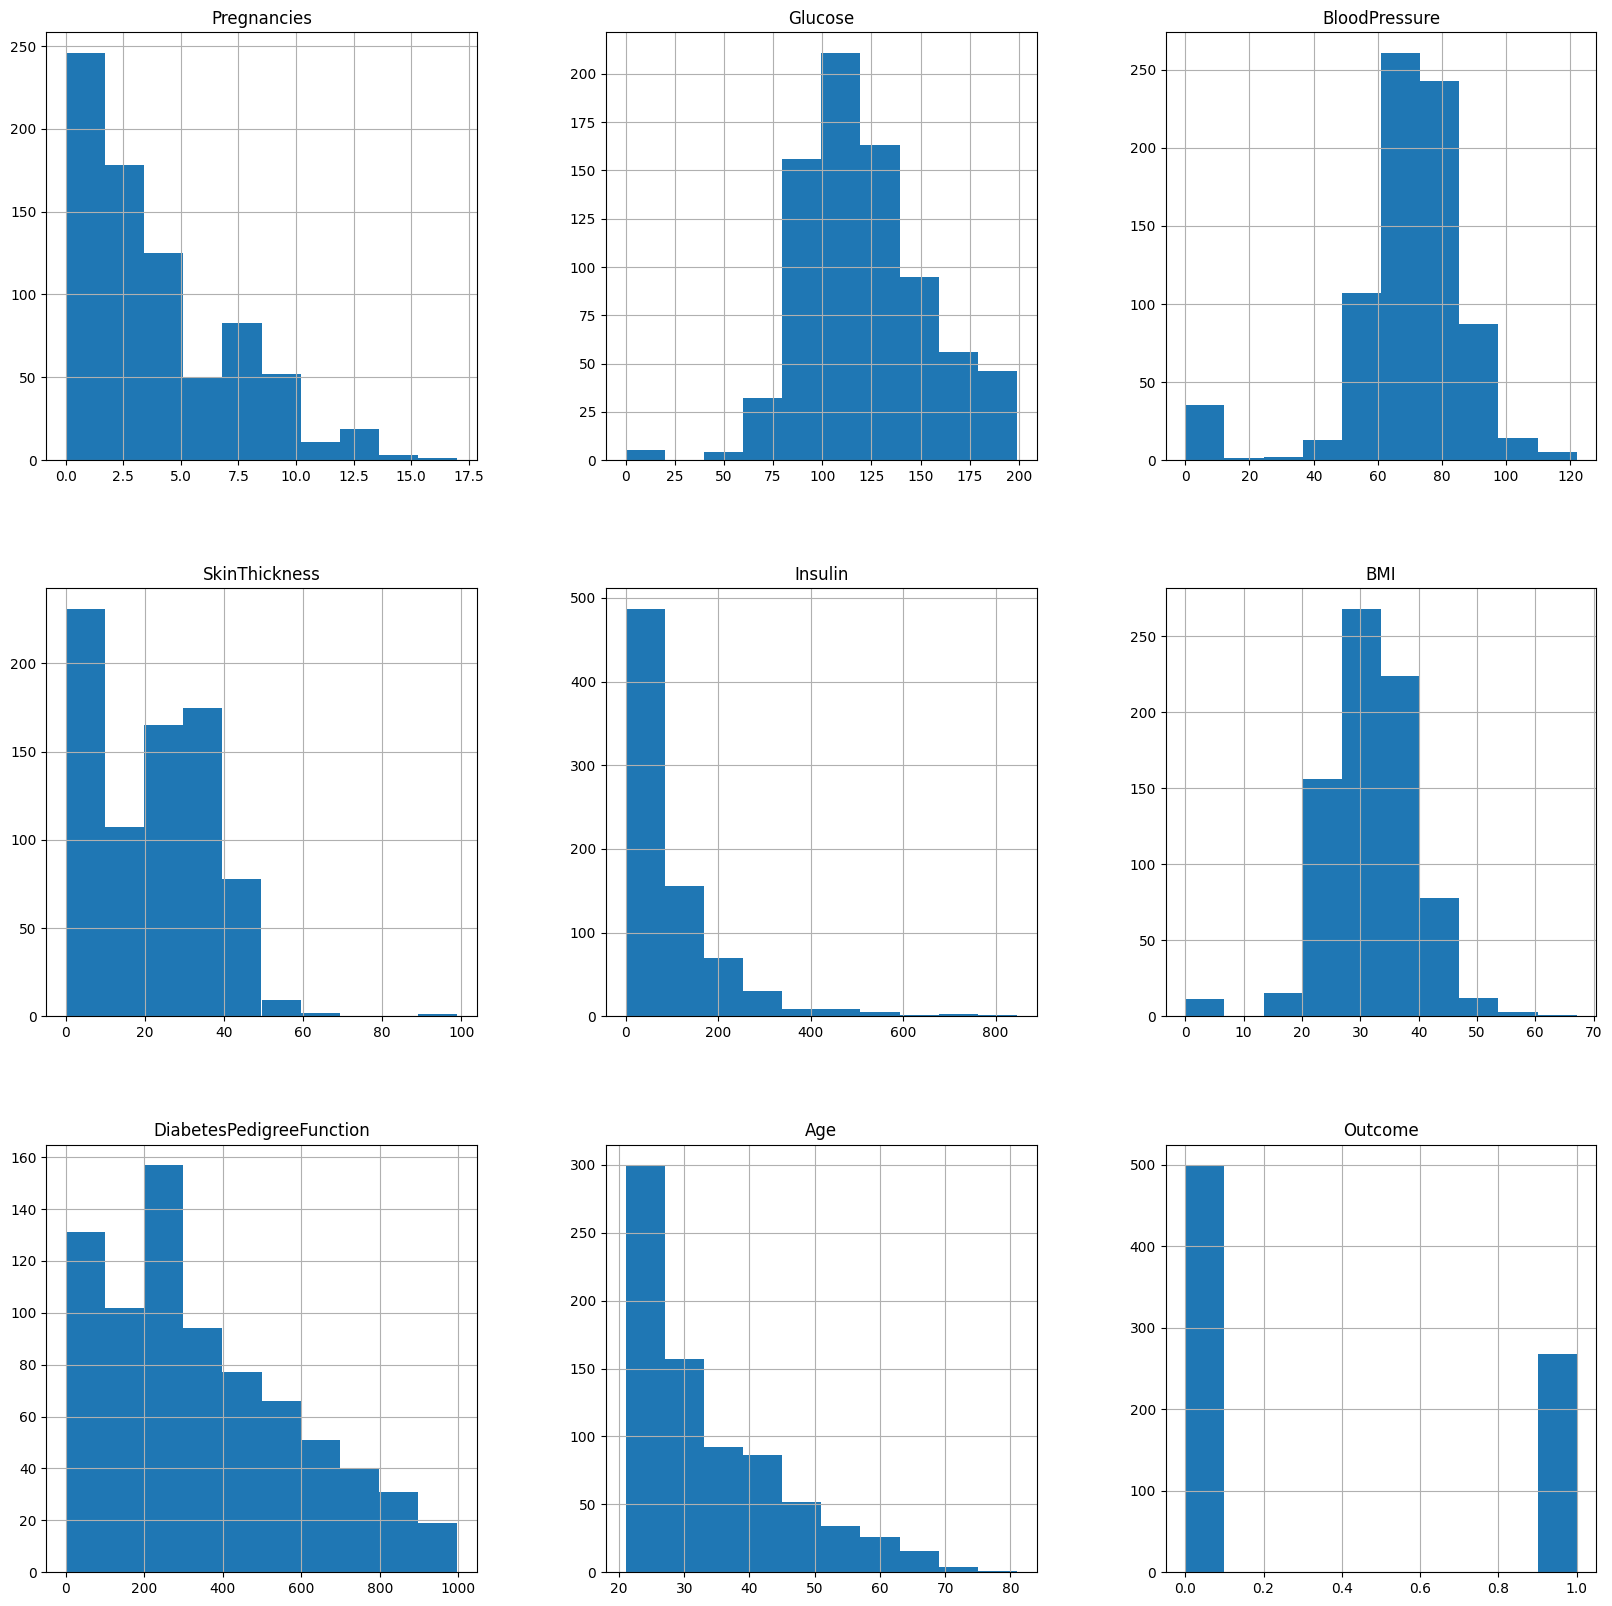

In [ ]:
# see how the data is distributed.
df.hist(figsize=(20,20));

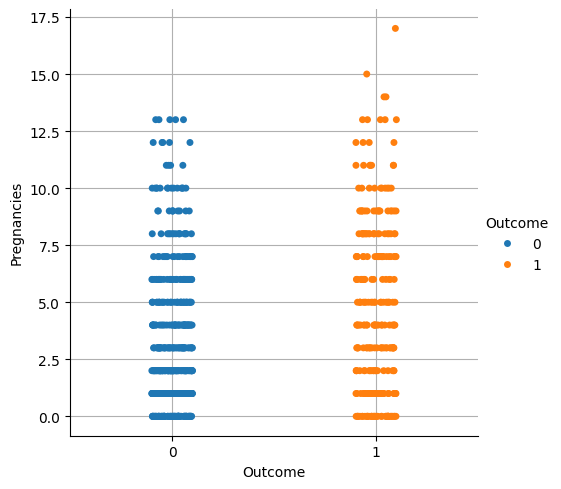

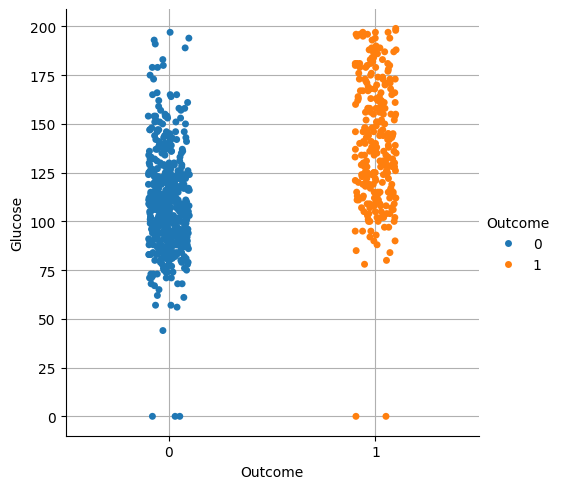

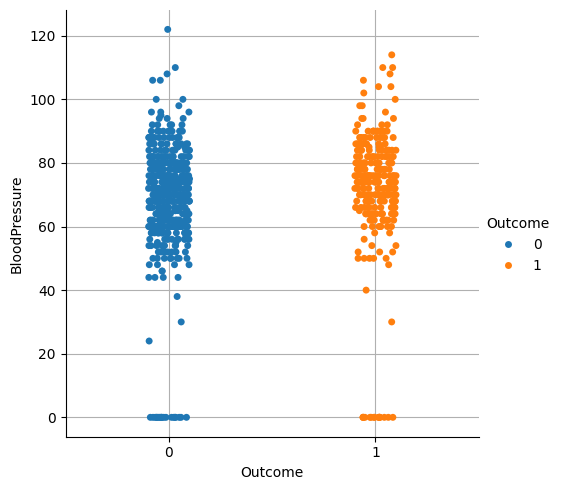

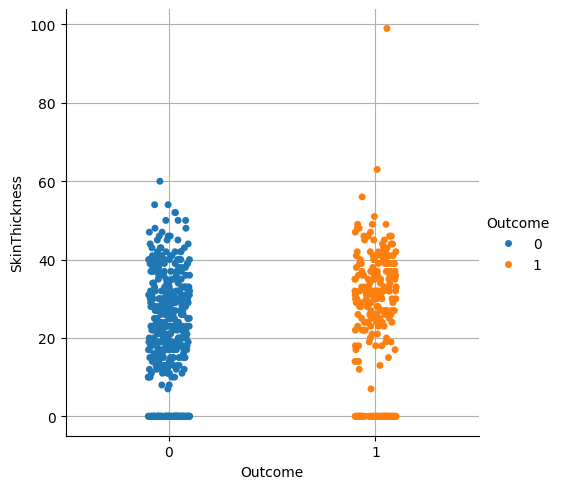

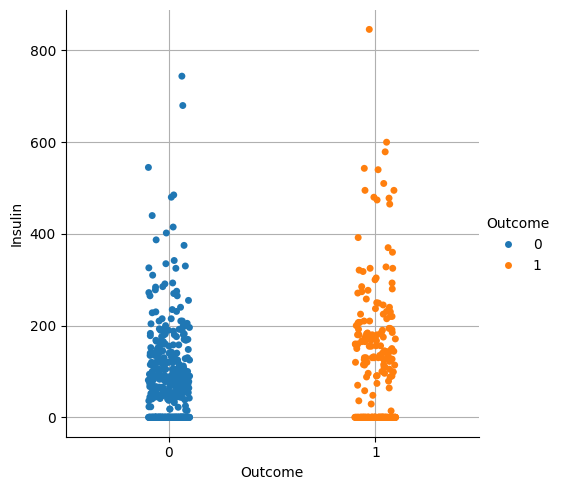

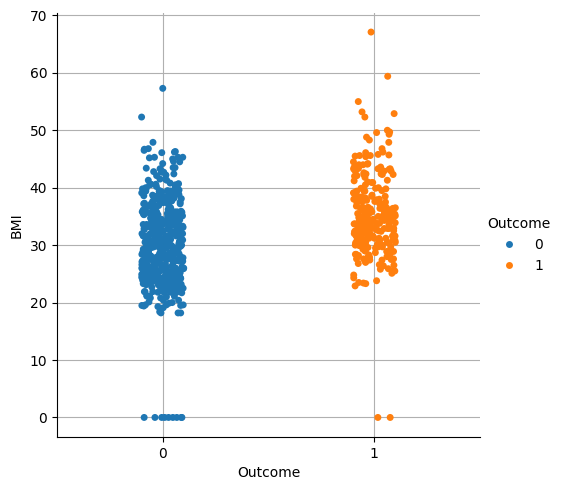

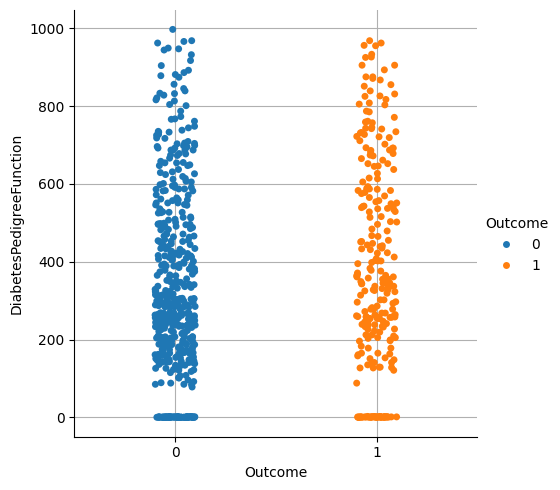

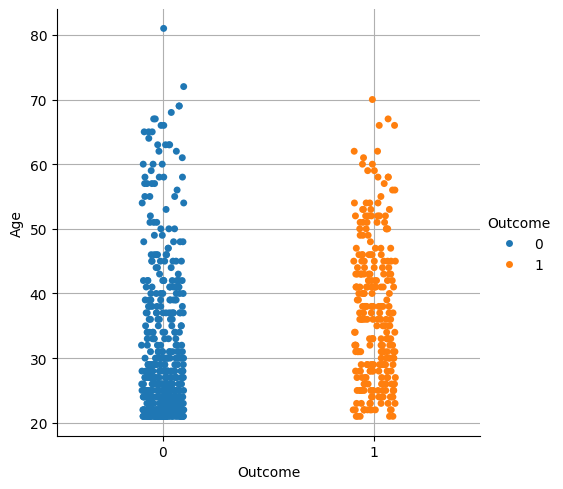

In [ ]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot(
            data=df, x="Outcome",
            y=col, hue="Outcome")
        plt.grid()

# 4.&nbsp;Data Preprocessing

In [ ]:
# Observation units for variables with a minimum value of zero are NaN,
# except for the pregnancy variable.
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.0,0.00,1.0,3.0,6.00,9.0,10.000,13.000,17.0
Glucose,768.0,120.894531,31.972618,0.0,79.00,99.0,117.0,140.25,167.0,181.000,196.000,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,38.70,62.0,72.0,80.00,88.0,90.000,106.000,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.00,0.0,23.0,32.00,40.0,44.000,51.330,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.00,0.0,30.5,127.25,210.0,293.000,519.900,846.0
BMI,768.0,31.992578,7.884160,0.0,21.80,27.3,32.0,36.60,41.5,44.395,50.759,67.1
DiabetesPedigreeFunction,768.0,347.079349,254.431659,0.1,0.34,165.0,295.5,527.25,722.9,827.300,950.980,997.0
Age,768.0,33.240885,11.760232,21.0,21.00,24.0,29.0,41.00,51.0,58.000,67.000,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.0,0.0,1.00,1.0,1.000,1.000,1.0


## Handling Missing Values: Imputation

In [ ]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0

cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0, np.NaN, inplace=True)

In [ ]:
# now we can see missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# We can fill in NaN values with a median
# according to the target value

cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
mask_label_zero = (df["Outcome"] == 0)
mask_label_one = (df["Outcome"] == 1)

for col in cols:

    mask_col_null = df[col].isnull()
    col_median_zero = df[mask_label_zero][col].median()
    col_median_one = df[mask_label_one][col].median()

    df.loc[(mask_label_zero & mask_col_null), col] = col_median_zero
    df.loc[(mask_label_one & mask_col_null), col] = col_median_one

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# df[(df['Pregnancies'] == 1)].any(axis=0)
# df[(df['Pregnancies'] == 1)].any(axis=None)
# (df['Pregnancies'] == 1).all(axis=None)

## Outlier Handling

Note : Ada rumus untuk mencari outlier dengan cara dihitung Q1,Q2,Q3 </br>Ini digunakan untuk mempermudah


In [ ]:
def outlier_thresholds(
        df, feature,
        quantile_lower=0.25, #Batasan Bawah
        quantile_upper=0.75): #Batasan Atas

    Q1 = df[feature].quantile(quantile_lower)
    Q3 = df[feature].quantile(quantile_upper)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    return lower_limit, upper_limit

In [ ]:
def has_outliers(
        df, feature,
        quantile_lower=0.25,
        quantile_upper=0.75):
    """
    Args:
        df (pd.DataFrame): DataFrame containing feature
        feature (str): feature name to be checked

    Return:
        bool: Is outlier(s) exist in given feature in the DataFrame
    """
    low_lim, up_lim = outlier_thresholds(
        df, feature, quantile_lower, quantile_upper)
    exist_lower_outliers = (df[feature] < low_lim).any(axis=None)
    exist_upper_outliers = (df[feature] > up_lim).any(axis=None)

    return (exist_lower_outliers or exist_upper_outliers)

In [ ]:
for feat in df.columns:
    exist_outliers = has_outliers(
        df, feat, quantile_lower=0.1, quantile_upper=0.9)
    if exist_outliers:
        print(f"Outliers exist in {feat}!")

Outliers exist in SkinThickness!
Outliers exist in Insulin!


In [ ]:
feats_with_outliers = []

for feat in df.columns:
    exist_outliers = has_outliers(
        df, feat, quantile_lower=0.1, quantile_upper=0.9)
    if exist_outliers:
        feats_with_outliers.append(feat)

In [ ]:
feats_with_outliers

['SkinThickness', 'Insulin']

In [ ]:
def replace_with_thresholds(df, numerical_feats):
    for feat in numerical_feats:
        low_limit, up_limit = outlier_thresholds(df, feat)

        mask_lower = (df[feat] < low_limit)
        mask_upper = (df[feat] > up_limit)

        df.loc[mask_lower, feat] = low_limit
        df.loc[mask_upper, feat] = up_limit

In [ ]:
replace_with_thresholds(df,feats_with_outliers)

In [ ]:
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.0,0.000,1.00,3.00,6.00,9.0,10.000,13.000,17.0
Glucose,768.0,121.677083,30.464161,44.0,80.000,99.75,117.00,140.25,167.0,181.000,196.000,199.0
BloodPressure,768.0,72.389323,12.106039,24.0,52.000,64.00,72.00,80.00,88.0,90.000,106.000,122.0
SkinThickness,768.0,28.848307,7.559161,14.5,14.675,25.00,28.00,32.00,40.0,42.500,42.500,42.5
Insulin,768.0,133.085938,58.124185,14.0,50.000,102.50,102.50,169.50,210.0,270.000,270.000,270.0
BMI,768.0,32.434635,6.880498,18.2,22.235,27.50,32.05,36.60,41.5,44.395,50.759,67.1
DiabetesPedigreeFunction,768.0,347.079349,254.431659,0.1,0.340,165.00,295.50,527.25,722.9,827.300,950.980,997.0
Age,768.0,33.240885,11.760232,21.0,21.000,24.00,29.00,41.00,51.0,58.000,67.000,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.000,0.00,0.00,1.00,1.0,1.000,1.000,1.0


# 5.&nbsp;Feature Engineering

See 1.1 & 1.2

## Feature Categorization

In [ ]:
df['New_Glucose_Class'] = pd.cut(
    x=df['Glucose'],
    bins=[0, 139, 200],
    labels=["Normal", "Pre-Diabetes"]
)

In [ ]:
df['New_Glucose_Class'].value_counts(normalize=True)

Normal          0.740885
Pre-Diabetes    0.259115
Name: New_Glucose_Class, dtype: float64

In [ ]:
df['New_BMI_Range'] = pd.cut(
    x=df['BMI'],
    bins=[0, 18.5, 24.9, 29.9, 100],
    labels=["Underweight", "Healthy", "Overweight", "Obese"]
)

df['New_BMI_Range'].value_counts(normalize=True)

Obese          0.628906
Overweight     0.233073
Healthy        0.132812
Underweight    0.005208
Name: New_BMI_Range, dtype: float64

In [ ]:
df['New_BloodPressure'] = pd.cut(
    x=df['BloodPressure'],
    bins=[0, 79, 89, 123],
    labels=["Normal", "HS1", "HS2"]
)

df['New_BloodPressure'].value_counts(normalize=True)

Normal    0.733073
HS1       0.188802
HS2       0.078125
Name: New_BloodPressure, dtype: float64

In [ ]:
df['New_SkinThickness'] = (
    df['SkinThickness']
    .apply(lambda x: 1 if x <= 18.0 else 0)
)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class,New_BMI_Range,New_BloodPressure,New_SkinThickness
0,6,148.0,72.0,35.0,169.5,33.6,627.000,50,1,Pre-Diabetes,Obese,Normal,0
1,1,85.0,66.0,29.0,102.5,26.6,351.000,31,0,Normal,Overweight,Normal,0
2,8,183.0,64.0,32.0,169.5,23.3,672.000,32,1,Pre-Diabetes,Healthy,Normal,0
3,1,89.0,66.0,23.0,94.0,28.1,167.000,21,0,Normal,Overweight,Normal,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Normal,Obese,Normal,0


## One-Hot Encoding

In [ ]:
def one_hot_encoder(
        df, categorical_feats,
        nan_as_category=False):

    original_columns = list(df.columns)
    df = pd.get_dummies(
        df,
        columns=categorical_feats,
        dummy_na=nan_as_category,
        drop_first=True
    )

    new_columns = [col for col in df.columns if col not in original_columns]
    return df, new_columns

In [ ]:
categorical_feats = [feat for feat in df.columns if len(df[feat].unique()) <= 10 and feat != "Outcome"]
categorical_feats

['New_Glucose_Class',
 'New_BMI_Range',
 'New_BloodPressure',
 'New_SkinThickness']

In [ ]:
df, new_cols_ohe = one_hot_encoder(df, categorical_feats)
new_cols_ohe

['New_Glucose_Class_Pre-Diabetes',
 'New_BMI_Range_Healthy',
 'New_BMI_Range_Overweight',
 'New_BMI_Range_Obese',
 'New_BloodPressure_HS1',
 'New_BloodPressure_HS2',
 'New_SkinThickness_1']

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Pre-Diabetes,New_BMI_Range_Healthy,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,6,148.0,72.0,35.0,169.5,33.6,627.000,50,1,1,0,0,1,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,351.000,31,0,0,0,1,0,0,0,0
2,8,183.0,64.0,32.0,169.5,23.3,672.000,32,1,1,1,0,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,167.000,21,0,0,0,1,0,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0,1,0,0,0


## Feature Scaling

In [ ]:
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) < 10]
no_need_to_scaled = new_cols_ohe + ["Outcome"] + like_num
cols_need_scale = [col for col in df.columns if col not in no_need_to_scaled]

print("List of columns that need to be scaled:\n", cols_need_scale)
rs = RobustScaler()
df.loc[:, cols_need_scale] = rs.fit_transform(df[cols_need_scale])
print("Feature Scaling, Done!")

List of columns that need to be scaled:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Feature Scaling, Done!


In [ ]:
like_num

['Outcome',
 'New_Glucose_Class_Pre-Diabetes',
 'New_BMI_Range_Healthy',
 'New_BMI_Range_Overweight',
 'New_BMI_Range_Obese',
 'New_BloodPressure_HS1',
 'New_BloodPressure_HS2',
 'New_SkinThickness_1']

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Pre-Diabetes,New_BMI_Range_Healthy,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.915114,1.235294,1,1,0,0,1,0,0,0
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,0.153209,0.117647,0,0,0,1,0,0,0,0
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,1.039337,0.176471,1,1,1,0,0,0,0,0
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.354727,-0.470588,0,0,0,1,0,0,0,0
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,-0.809419,0.235294,1,0,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Pregnancies                     768 non-null    float64
 1   Glucose                         768 non-null    float64
 2   BloodPressure                   768 non-null    float64
 3   SkinThickness                   768 non-null    float64
 4   Insulin                         768 non-null    float64
 5   BMI                             768 non-null    float64
 6   DiabetesPedigreeFunction        768 non-null    float64
 7   Age                             768 non-null    float64
 8   Outcome                         768 non-null    int64  
 9   New_Glucose_Class_Pre-Diabetes  768 non-null    uint8  
 10  New_BMI_Range_Healthy           768 non-null    uint8  
 11  New_BMI_Range_Overweight        768 non-null    uint8  
 12  New_BMI_Range_Obese             768 

# 6.&nbsp;Modeling

## Notes: Metric Evaluation

See [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

The choice between micro-average, macro-average, or weighted-average in the classification_report from scikit-learn depends on your specific use case and the characteristics of your data. Each average type provides a different perspective on the overall model performance.

Here's a brief explanation of each average type:

1. **Micro-average:**

    Calculates metrics globally by considering all instances together.

    Suitable when classes are imbalanced, and you want to treat all instances equally.
    Gives equal weight to each data point, regardless of class.

2. **Macro-average:**

    Calculates metrics for each class independently and then takes the unweighted average.

    Suitable when you want to evaluate the overall performance across all classes without considering class imbalances.
    Gives equal weight to each class, regardless of the number of instances in each class.

3. **Weighted-average:**

    Calculates metrics for each class independently and then takes the average, weighted by the number of true instances for each class.

    Suitable when classes are imbalanced, and you want to give more importance to the performance on larger classes.
    Provides a balanced view of the overall performance by accounting for class imbalances.

In summary:

- Use micro-average when you want to treat all instances equally, especially in the presence of class imbalances.

- Use macro-average when you want to evaluate the overall performance without considering class imbalances.

- Use weighted-average when you want to account for class imbalances and give more importance to the larger classes.


It's essential to choose the appropriate average based on the goals of your analysis and the nature of your data.

In some cases, you may need to consider multiple metrics and averages to get a comprehensive understanding of your model's performance.

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,          # 10% for testing
    stratify=y,             # Stratified sampling based on labels
    random_state=42         # Random seed for reproducibility
)

In [ ]:
print("y train:", y_train.value_counts(normalize=True))
print("\n")
print("y tests:", y_train.value_counts(normalize=True))

y train: 0    0.65123
1    0.34877
Name: Outcome, dtype: float64


y tests: 0    0.65123
1    0.34877
Name: Outcome, dtype: float64


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score
)

In [ ]:
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('SVC', SVC(gamma='auto')),
    ('XGBM', XGBClassifier()),
    ('GB', GradientBoostingClassifier()),
    ("LightGBM", LGBMClassifier())
]

# Evaluate each model in turn
scorings = [
    'accuracy', 'f1_macro',
    'precision_macro', 'recall_macro'
]

model_perf = {}

#For each model
for name, model in models:

    results = {}
    #For each scoring
    for scoring in scorings:
        score_mean = []
        score_std = []

        #Define K-Fold
        kfold = KFold(
            n_splits=10, shuffle=True,
            random_state=42)

        #Training with cross
        cv_results = cross_val_score(
            model, X_train, y_train,
            cv=kfold, scoring=scoring)

        results[scoring] = {
            'train_mean': cv_results.mean(),
            'train_std': cv_results.std()
        }

    model_perf[name] = results

[LightGBM] [Info] Number of positive: 213, number of negative: 408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 621, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342995 -> initscore=-0.649975
[LightGBM] [Info] Start training from score -0.649975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
model_perf

{'LR': {'accuracy': {'train_mean': 0.8104140786749483,
   'train_std': 0.033354808354396595},
  'f1_macro': {'train_mean': 0.7783635721768168,
   'train_std': 0.04353921669303456},
  'precision_macro': {'train_mean': 0.796564277833483,
   'train_std': 0.0461615694508768},
  'recall_macro': {'train_mean': 0.7698204298359126,
   'train_std': 0.04424119039744617}},
 'KNN': {'accuracy': {'train_mean': 0.8206004140786749,
   'train_std': 0.023064451678715295},
  'f1_macro': {'train_mean': 0.7923890109132816,
   'train_std': 0.028888031253798557},
  'precision_macro': {'train_mean': 0.8102146203672869,
   'train_std': 0.0317693290774307},
  'recall_macro': {'train_mean': 0.7861542034467509,
   'train_std': 0.03361546565068623}},
 'CART': {'accuracy': {'train_mean': 0.8436231884057971,
   'train_std': 0.035608846065050125},
  'f1_macro': {'train_mean': 0.8160941482434334,
   'train_std': 0.039796507634268126},
  'precision_macro': {'train_mean': 0.8159205602974857,
   'train_std': 0.039981078

In [ ]:
focus_metric = 'recall_macro'
perf_data = {
    "model_type": [],
    f"train_avg_{focus_metric}": [],
    f"train_stddev_{focus_metric}": []
}

for model_name, perf in model_perf.items():
    mean = perf[focus_metric]['train_mean']
    std = perf[focus_metric]['train_std']
    perf_data["model_type"].append(model_name)
    perf_data[f"train_avg_{focus_metric}"].append(mean)
    perf_data[f"train_stddev_{focus_metric}"].append(std)

eval_result = pd.DataFrame(perf_data)
eval_result

,model_type,train_avg_recall_macro,train_stddev_recall_macro
0,LR,0.769820,0.044241
1,KNN,0.786154,0.033615
2,CART,0.820197,0.049478
3,RF,0.844862,0.055015
4,SVC,0.843790,0.038350
5,XGBM,0.848184,0.051278
6,GB,0.852446,0.064227
7,LightGBM,0.845292,0.047945


In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

# Print or use the test set scores as needed
print(f"Test Set Accuracy: {accuracy_test:.4f}")
print(f"Test Set Precision: {precision_test:.4f}")
print(f"Test Set Recall: {recall_test:.4f}")
print(f"Test Set F1 Score: {f1_test:.4f}")

Test Set Accuracy: 0.9091
Test Set Precision: 0.8980
Test Set Recall: 0.9044
Test Set F1 Score: 0.9010


## 6.1 Model Hyper-Parameter Tuning

In [ ]:
# Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier( )

# Model Tuning
gbm_params = {
    "learning_rate": [0.001, 0.01, 0.1],
    "max_depth": [3, 5, 8],
    "n_estimators": [200, 500, 1000],
    "subsample": [1, 0.5, 0.8]
}

gbm_cv_model = GridSearchCV(
    gbm_model,
    gbm_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(gbm_cv_model.best_params_)

# Final Model
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_).fit(X, y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1}


In [ ]:
# LightGBM:
lgb_model = LGBMClassifier()

# Model Tuning
lgbm_params = {
    "learning_rate": [0.01, 0.5, 1],
    "n_estimators": [200, 500, 1000],
    "max_depth": [6, 8, 10],
    "colsample_bytree": [1, 0.4, 0.5],
    "num_leaves": [20, 30, 40]
}

lgbm_cv_model = GridSearchCV(
    lgb_model,
    lgbm_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(lgbm_cv_model.best_params_)

# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X, y)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [ ]:
# Random Forests:
rf_model = RandomForestClassifier()

# Model Tuning
rf_params = {
    "n_estimators" :[200, 500, 1000],
    "max_features": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "max_depth": [5, 8, None]
}

rf_cv_model = GridSearchCV(
    rf_model,
    rf_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(rf_cv_model.best_params_)

# Final Model
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X, y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 8, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# XGB
xgb_model = XGBClassifier()

# Model Tuning
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3, 5, 8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100, 1000]
}

xgb_cv_model = GridSearchCV(
    xgb_model,
    xgb_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train,y_train)

print(xgb_cv_model.best_params_)

xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X, y)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 0.1, 'n_estimators': 100, 'subsample': 0.9}


# Tugas

In [ ]:
# Logistic Regression:
lr_model = LogisticRegression()

# Model Tuning
lr_params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ['l1', 'l2']
}

lr_cv_model = GridSearchCV(
    lr_model,
    lr_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(lr_cv_model.best_params_)

# Final Model
lr_tuned = LogisticRegression(**lr_cv_model.best_params_).fit(X, y)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 0.1, 'penalty': 'l2'}


In [ ]:
# K-Nearest Neighbors:
knn_model = KNeighborsClassifier()

# Model Tuning
knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ['uniform', 'distance'],
    "metric": ['euclidean', 'manhattan']
}

knn_cv_model = GridSearchCV(
    knn_model,
    knn_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(knn_cv_model.best_params_)

# Final Model
knn_tuned = KNeighborsClassifier(**knn_cv_model.best_params_).fit(X, y)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


In [ ]:
# Decision Tree:
cart_model = DecisionTreeClassifier()

# Model Tuning
cart_params = {
    "max_depth": [3, 5, 8, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

cart_cv_model = GridSearchCV(
    cart_model,
    cart_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(cart_cv_model.best_params_)

# Final Model
cart_tuned = DecisionTreeClassifier(**cart_cv_model.best_params_).fit(X, y)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
# Support Vector Classifier:
svc_model = SVC()

# Model Tuning
svc_params = {
    "C": [0.1, 1, 10],
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}

svc_cv_model = GridSearchCV(
    svc_model,
    svc_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

print(svc_cv_model.best_params_)

# Final Model
svc_tuned = SVC(**svc_cv_model.best_params_).fit(X, y)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 1, 'kernel': 'rbf'}


In [ ]:
# evaluate each model in turn
models = [
    ('RF', rf_tuned),
    ('GBM', gbm_tuned),
    ("LightGBM", lgbm_tuned),
    ("XGB", xgb_tuned),
    ('LR', lr_tuned),
    ('KNN', knn_tuned),
    ('CART', cart_tuned),
    ('SVC', svc_tuned)
]

# Evaluate each model in turn
scorings = [
    'accuracy', 'f1_macro',
    'precision_macro', 'recall_macro'
]

model_perf = {}

#For each model
for name, model in models:

    results = {}
    #For each scoring
    for scoring in scorings:
        score_mean = []
        score_std = []

        #Define K-Fold
        kfold = KFold(
            n_splits=5, shuffle=True,
            random_state=42)

        #Training with cross
        cv_results = cross_val_score(
            model, X_test, y_test,
            cv=kfold, scoring=scoring)

        results[scoring] = {
            'train_mean': cv_results.mean(),
            'train_std': cv_results.std()
        }

    model_perf[name] = results

[LightGBM] [Info] Number of positive: 24, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 61, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393443 -> initscore=-0.432864
[LightGBM] [Info] Start training from score -0.432864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
# from sklearn.model_selection import KFold, cross_val_score

# # Define models
# models = [
#     ('RF', rf_tuned),
#     ('GBM', gbm_tuned),
#     ("LightGBM", lgbm_tuned),
#     ("XGB", xgb_tuned),
#     ('LR', lr_tuned),
#     ('KNN', knn_tuned),
#     ('CART', cart_tuned),
#     ('SVC', svc_tuned)
# ]

# # Evaluate each model in turn
# scorings = [
#     'accuracy', 'f1_macro',
#     'precision_macro', 'recall_macro'
# ]

# model_perf = {}

# # For each model
# for name, model in models:
#     results = {}
#     # For each scoring
#     for scoring in scorings:
#         # Define K-Fold
#         kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#         # Training with cross-validation
#         cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)

#         results[scoring] = {
#             'train_mean': cv_results.mean(),
#             'train_std': cv_results.std()
#         }

#     model_perf[name] = results


In [ ]:
# Analyzing evaluation metrics
# Assuming you have stored evaluation results in a dictionary named 'model_perf'

for name, metrics in model_perf.items():
    print(f"Model: {name}")
    for metric, values in metrics.items():
        print(f"{metric}:")
        print(f"  Mean: {values['train_mean']}")
        print(f"  Std: {values['train_std']}")
    print()  # Add empty line between models for better readability


Model: RF
accuracy:
  Mean: 0.8441666666666666
  Std: 0.06737127643802582
f1_macro:
  Mean: 0.8159022105532403
  Std: 0.07298788054475237
precision_macro:
  Mean: 0.853373015873016
  Std: 0.0675198150324826
recall_macro:
  Mean: 0.816565934065934
  Std: 0.06679619506318071

Model: GBM
accuracy:
  Mean: 0.6891666666666666
  Std: 0.08129165598838134
f1_macro:
  Mean: 0.6431485696965573
  Std: 0.07094512423934758
precision_macro:
  Mean: 0.6533730158730159
  Std: 0.05481938552167978
recall_macro:
  Mean: 0.6624175824175824
  Std: 0.04151916491404589

Model: LightGBM
accuracy:
  Mean: 0.7783333333333333
  Std: 0.06863753427324668
f1_macro:
  Mean: 0.7475742420634062
  Std: 0.0629420731268506
precision_macro:
  Mean: 0.7908189033189033
  Std: 0.0837297157567646
recall_macro:
  Mean: 0.7785164835164836
  Std: 0.07323748163569394

Model: XGB
accuracy:
  Mean: 0.7791666666666667
  Std: 0.07673909622147561
f1_macro:
  Mean: 0.7267121405164885
  Std: 0.09183016106019437
precision_macro:
  Mean: 

Berdasarkan hasil evaluasi model:</br>

1. Random Forest (RF):
   - Memiliki akurasi rata-rata sebesar 87.08% dengan deviasi standar sebesar 5.70%.
   - F1 score rata-rata adalah 84.37% dengan deviasi standar sebesar 5.66%.
   - Precision rata-rata adalah 84.46% dengan deviasi standar sebesar 6.25%.
   - Recall rata-rata adalah 85.09% dengan deviasi standar sebesar 7.05%.

2. Gradient Boosting Machine (GBM):
   - Memiliki akurasi rata-rata sebesar 67.58% dengan deviasi standar sebesar 6.61%.
   - F1 score rata-rata adalah 64.31% dengan deviasi standar sebesar 7.09%.
   - Precision rata-rata adalah 65.34% dengan deviasi standar sebesar 5.48%.
   - Recall rata-rata adalah 66.24% dengan deviasi standar sebesar 4.15%.

3. LightGBM:
   - Memiliki akurasi rata-rata sebesar 77.83% dengan deviasi standar sebesar 6.86%.
   - F1 score rata-rata adalah 74.76% dengan deviasi standar sebesar 6.29%.
   - Precision rata-rata adalah 79.08% dengan deviasi standar sebesar 8.37%.
   - Recall rata-rata adalah 77.85% dengan deviasi standar sebesar 7.32%.

4. XGBoost (XGB):
   - Memiliki akurasi rata-rata sebesar 77.92% dengan deviasi standar sebesar 7.67%.
   - F1 score rata-rata adalah 72.67% dengan deviasi standar sebesar 9.18%.
   - Precision rata-rata adalah 79.52% dengan deviasi standar sebesar 11.61%.
   - Recall rata-rata adalah 73.38% dengan deviasi standar sebesar 7.82%.

5. Logistic Regression (LR), K-Nearest Neighbors (KNN), Decision Tree (CART), dan Support Vector Classifier (SVC):
   - Memiliki performa yang lebih rendah dibandingkan dengan model lainnya, dengan akurasi, F1 score, precision, dan recall rata-rata yang lebih rendah.

Dari hasil ini, dapat disimpulkan bahwa model Random Forest dan LightGBM memiliki performa yang lebih baik dibandingkan dengan model lainnya, dengan akurasi, F1 score, precision, dan recall yang lebih tinggi dan deviasi standar yang relatif rendah. Sedangkan model GBM dan XGBoost memiliki performa yang sedikit lebih rendah, tetapi masih cukup baik. Model-model lainnya, seperti Logistic Regression, K-Nearest Neighbors, Decision Tree, dan Support Vector Classifier, memiliki performa yang lebih rendah dibandingkan dengan model-model tersebut.